### Pokemon Dataset Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data
pokeframe = pd.read_csv("pokemon.csv")

In [3]:
pokeframe.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Notes: Rather than work with absolute numbers which are skewed by work with relative ratios or normalised

##### Fastest Pokemon

In [4]:
# Including Legendaries
pokeframe.loc[pokeframe['Speed'].argmax()]['Name']

'DeoxysSpeed Forme'

In [5]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Speed'].argmax()]['Name']

'Ninjask'

##### Healthiest Pokemon

In [6]:
# Including Legendaries
pokeframe.loc[pokeframe['HP'].argmax()]['Name']

'Blissey'

In [7]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['HP'].argmax()]['Name']

'Blissey'

##### Most Physically Dangerous Pokemon

In [8]:
# Including Legendaries
pokeframe.loc[pokeframe['Attack'].argmax()]['Name']

'MewtwoMega Mewtwo X'

In [9]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Attack'].argmax()]['Name']

'HeracrossMega Heracross'

##### Most Physically Tough Pokemon

In [10]:
# Including Legendaries
pokeframe.loc[pokeframe['Defense'].argmax()]['Name']

'SteelixMega Steelix'

In [11]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Defense'].argmax()]['Name']

'SteelixMega Steelix'

##### Most Specially Dangerous Pokemon

In [12]:
# Including Legendaries
pokeframe.loc[pokeframe['Sp. Atk'].argmax()]['Name']

'MewtwoMega Mewtwo Y'

In [13]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Sp. Atk'].argmax()]['Name']

'AlakazamMega Alakazam'

##### Most Specially Tough Pokemon

In [14]:
# Including Legendaries
pokeframe.loc[pokeframe['Sp. Def'].argmax()]['Name']

'Shuckle'

In [15]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Sp. Def'].argmax()]['Name']

'Shuckle'

Which is the best starter pokemon?

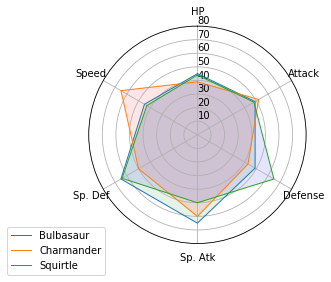

In [16]:
# Radar Chart
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories= np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,80)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pokeframe.loc[0]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Bulbasaur")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Ind2
values=pokeframe.loc[4]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Charmander")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=pokeframe.loc[9]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Squirtle")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [17]:
# Create Mega Column
mega = pokeframe["Name"].apply(lambda x: "Mega" in x and x != "Meganium")
mega.name = "Mega"
pokeframe = pd.concat([pokeframe, mega], axis = 1)

In [18]:
# Remove Megas
pokeframe = pokeframe[pokeframe["Mega"] == False]

In [19]:
# Normalise stas based on total

stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
pokeframe_normalised = pokeframe[:] # copies data frame

for stat in stats:
    pokeframe_normalised[stat] = pokeframe_normalised[stat] / pokeframe_normalised["Total"]

In [20]:
pokeframe_normalised.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,1,Bulbasaur,Grass,Poison,318,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1,False,False
1,2,Ivysaur,Grass,Poison,405,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1,False,False
2,3,Venusaur,Grass,Poison,525,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1,False,False
4,4,Charmander,Fire,NaN,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False,False
5,5,Charmeleon,Fire,NaN,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False,False
6,6,Charizard,Fire,Flying,534,0.146067,0.157303,0.146067,0.204120,0.159176,0.187266,1,False,False
9,7,Squirtle,Water,NaN,314,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943,1,False,False
10,8,Wartortle,Water,NaN,405,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210,1,False,False
11,9,Blastoise,Water,NaN,530,0.149057,0.156604,0.188679,0.160377,0.198113,0.147170,1,False,False
13,10,Caterpie,Bug,NaN,195,0.230769,0.153846,0.179487,0.102564,0.102564,0.230769,1,False,False


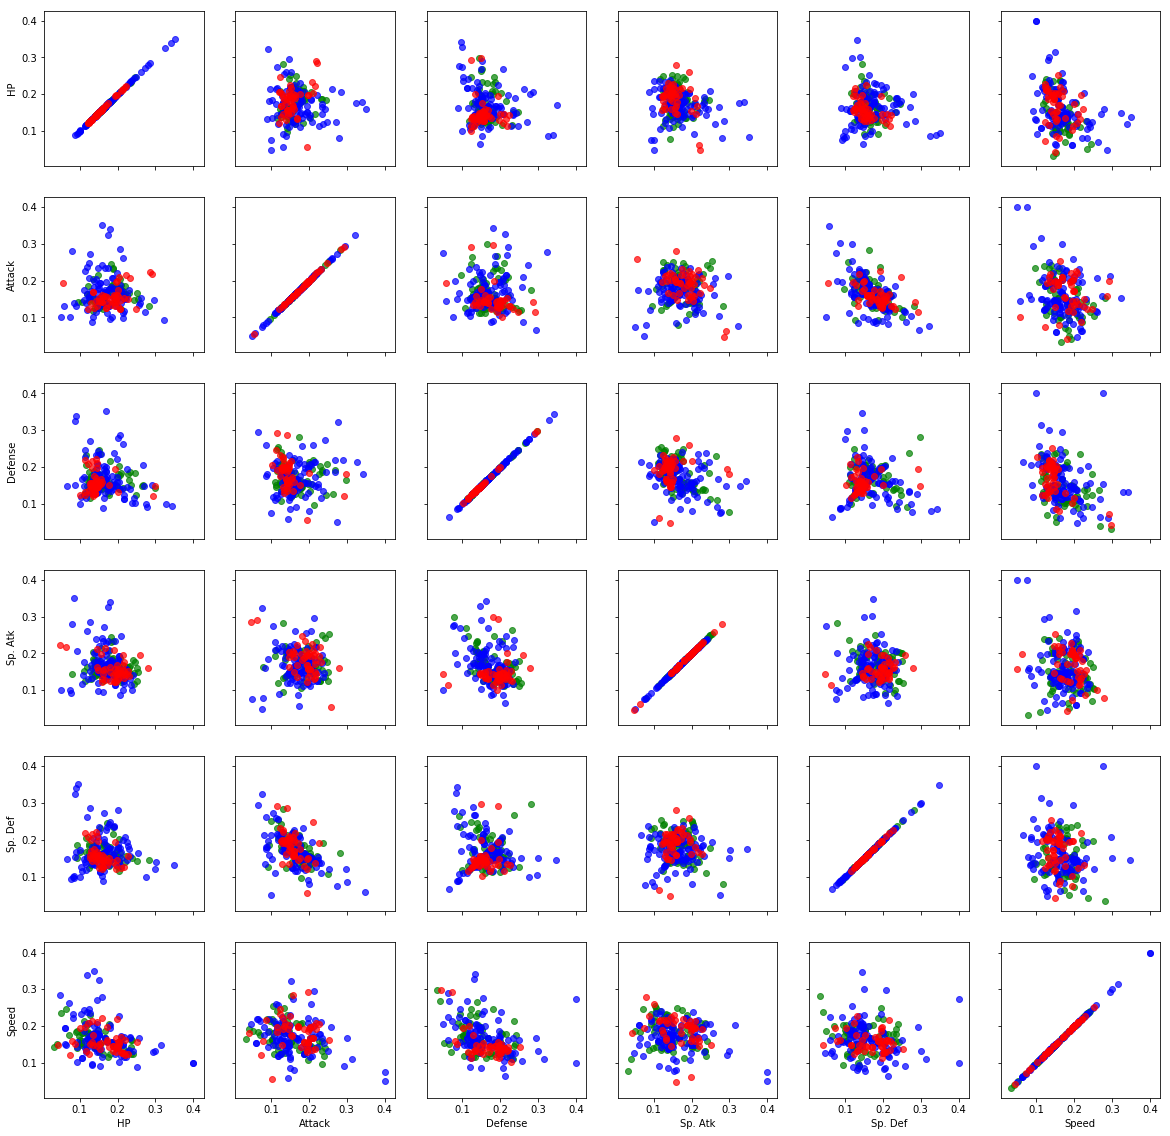

In [21]:
# Plot correlation between stats for a given type

# Colours 
colour = {"Grass":"g", "Water": "b", "Fire":"r"}

plot_num = 1
dim = len(stats) 

fig, axes = plt.subplots(dim, dim, figsize=(20,20), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.2) # adjust spacing between plots

for i, stat1 in enumerate(stats):
    for j, stat2 in enumerate(stats):        
        for poketype in colour.keys():
            x_data = pokeframe_normalised[pokeframe_normalised["Type 1"] == poketype][stat1]
            y_data = pokeframe_normalised[pokeframe_normalised["Type 1"] == poketype][stat2]
            axes[i, j].scatter(x=x_data, y=y_data, c=colour[poketype], alpha=0.7)
            
            if i in range(dim) and j == 0:
                axes[i, j].set(ylabel = stat1)
                
            if j in range(dim) and i == dim - 1:
                axes[i, j].set(xlabel = stat2)

plt.show()

# K-Nearest Neighbour

Use the normalised pokemon statistics to determine the type 1 of pokemon

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.utils import shuffle

In [22]:
# Determine how many of each type in order to split into 'training' and test

pokemon_types = pokeframe_normalised["Type 1"].unique()

In [23]:
pokemon_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

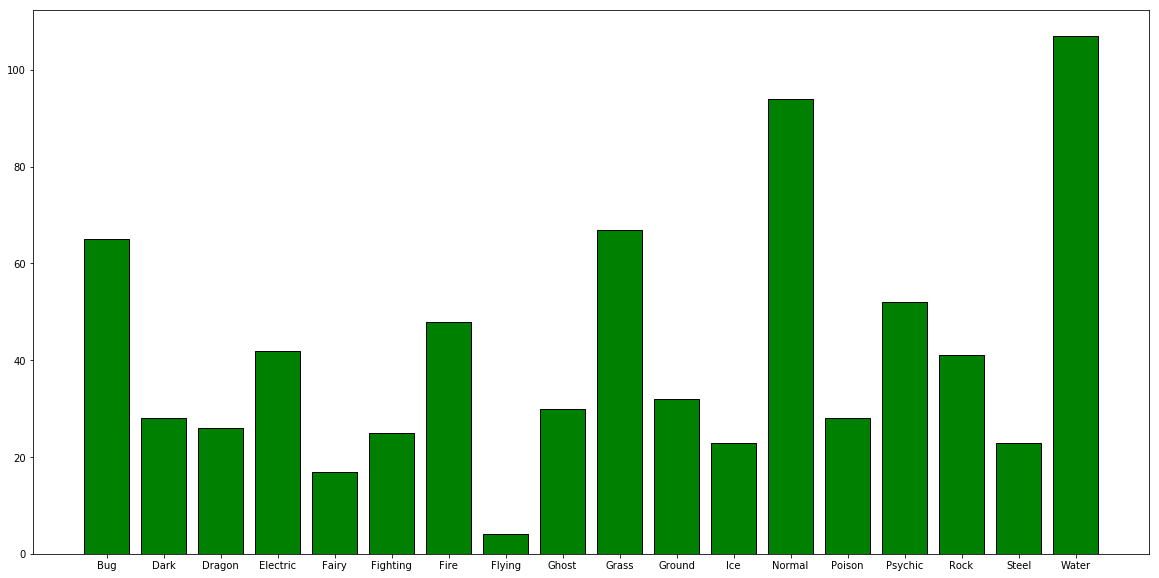

In [24]:
f, ax = plt.subplots(figsize=(20,10))
data = pokeframe_normalised["Type 1"].value_counts().sort_values()
ax.bar(height=data.data, x=data.index, ec="black", fc="green")
plt.show()

In [28]:
# Test 3 types: Grass, Normal and Water because most common (ignore bug because similar to grass)
normal_pokemon = pokeframe_normalised[pokeframe_normalised["Type 1"] == "Normal"]
grass_pokemon = pokeframe_normalised[pokeframe_normalised["Type 1"] == "Grass"]
water_pokemon = pokeframe_normalised[pokeframe_normalised["Type 1"] == "Water"]

In [32]:
# Sample to check data
normal_pokemon.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
488,440,Happiny,Normal,NaN,220,0.454545,0.022727,0.022727,0.068182,0.295455,0.136364,4,False,False
116,108,Lickitung,Normal,NaN,385,0.233766,0.142857,0.194805,0.155844,0.194805,0.077922,1,False,False
24,19,Rattata,Normal,NaN,253,0.118577,0.221344,0.138340,0.098814,0.138340,0.284585,1,False,False
579,520,Tranquill,Normal,Flying,358,0.173184,0.215084,0.173184,0.139665,0.117318,0.181564,5,False,False
92,85,Dodrio,Normal,Flying,460,0.130435,0.239130,0.152174,0.130435,0.130435,0.217391,1,False,False
727,659,Bunnelby,Normal,NaN,237,0.160338,0.151899,0.160338,0.135021,0.151899,0.240506,6,False,False
299,276,Taillow,Normal,Flying,270,0.148148,0.203704,0.111111,0.111111,0.111111,0.314815,3,False,False
313,289,Slaking,Normal,NaN,670,0.223881,0.238806,0.149254,0.141791,0.097015,0.149254,3,False,False
260,241,Miltank,Normal,NaN,490,0.193878,0.163265,0.214286,0.081633,0.142857,0.204082,2,False,False
728,660,Diggersby,Normal,Ground,423,0.200946,0.132388,0.182033,0.118203,0.182033,0.184397,6,False,False


In [47]:
train, test = train_test_split(normal_pokemon, test_size = 0.2)
print(len(train), type(train))

75 <class 'pandas.core.frame.DataFrame'>


In [48]:
inc_train, inc_test = train_test_split(water_pokemon, test_size = 0.2)
print(len(inc_train))

85


In [49]:
train = train.append(inc_train)

In [50]:
test = test.append(inc_test)

In [52]:
inc_train, inc_test = train_test_split(grass_pokemon, test_size = 0.2)
print(len(inc_train))

53


In [53]:
train = train.append(inc_train)

In [54]:
test = test.append(inc_test)

In [55]:
print(len(train), len(test))

213 55


In [76]:
train = shuffle(train)

In [59]:
# Define nearest neighbour
cls = neighbors.KNeighborsClassifier(n_neighbors=3) 

In [77]:
# Train data
categories= np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
X = train[categories]
y = train["Type 1"]

In [78]:
cls.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
test = shuffle(test)

In [80]:
# Test data
categories= np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
X_test = test[categories]
y_test = test["Type 1"]

In [81]:
cls.score(X_test, y_test)

0.50909090909090904